In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import PowerTransformer,FunctionTransforme
# # 1. Import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
file_path ='./Customer-Churn.csv'
def load_data(file_path):
    return pd.read_csv(file_path)

df =load_data(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data=df.copy()
data.drop('customerID',axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [6]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


C:\Users\Hany Mostafa\AppData\Local\Temp\ipykernel_6984\828112944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [8]:
data.duplicated().sum()

np.int64(22)

In [9]:
data = data.drop_duplicates()


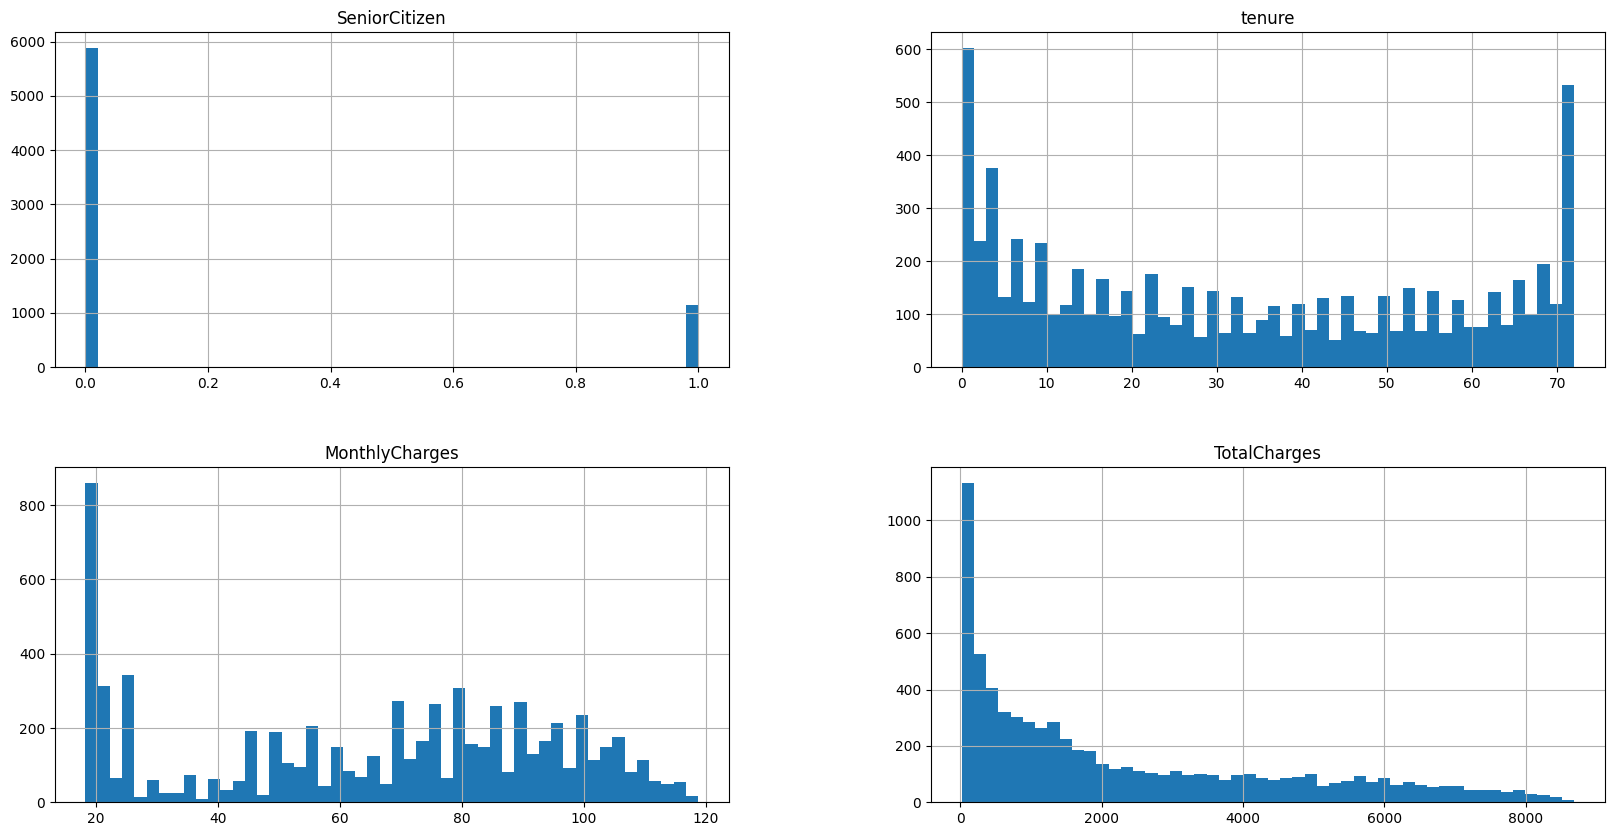

In [10]:
data.hist(bins=50,figsize=(20,10))
plt.show()

In [11]:
# # نحسب IQR
# Q1 = data['TotalCharges'].quantile(0.25)
# Q3 = data['TotalCharges'].quantile(0.75)
# IQR = Q3 - Q1

# # نحدد الـ boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data_cleaned = data[(data['TotalCharges'] >= lower_bound) & (data['TotalCharges'] <= upper_bound)]

In [12]:
for  x in data :print(x,df[x].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [13]:
yes_no_columns = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity' ,'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn' ] 
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0,'No internet service':0,'No phone service':0})

C:\Users\Hany Mostafa\AppData\Local\Temp\ipykernel_6984\2838311170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0,'No internet service':0,'No phone service':0})


In [14]:
data['gender'] = data['gender'].replace({'Female': 1, 'Male': 0})

C:\Users\Hany Mostafa\AppData\Local\Temp\ipykernel_6984\1700196944.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Female': 1, 'Male': 0})


In [15]:
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
hot_coder=['InternetService','Contract','PaymentMethod']
data = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

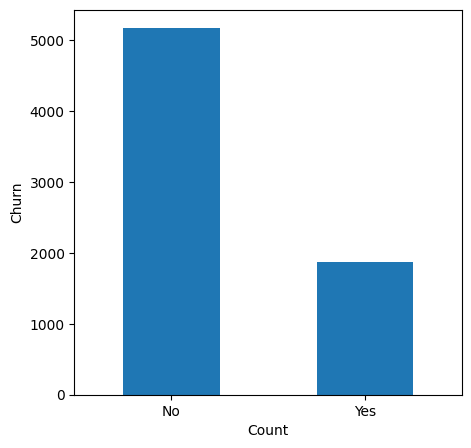

In [17]:
## Target values
df['Churn'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.xlabel('Count')
plt.ylabel('Churn')
plt.xticks(rotation=0)


In [18]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)


Logistic Regression Results (Threshold = 0.3)
Accuracy: 0.7331
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       372

    accuracy                           0.73      1405
   macro avg       0.70      0.75      0.70      1405
weighted avg       0.79      0.73      0.75      1405

Recall (Churn=1): 0.7823


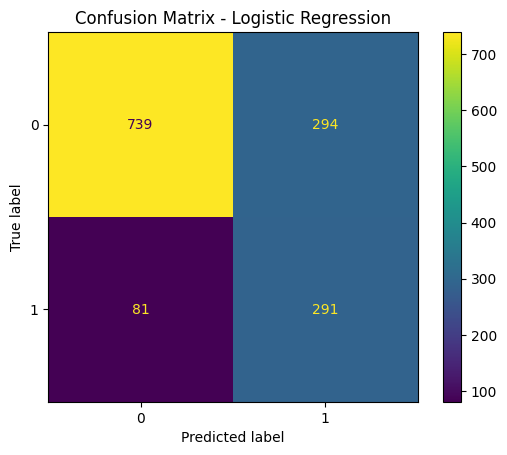


SVC Results (Threshold = 0.3)
Accuracy: 0.7466
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.75      0.61       372

    accuracy                           0.75      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.79      0.75      0.76      1405

Recall (Churn=1): 0.7473


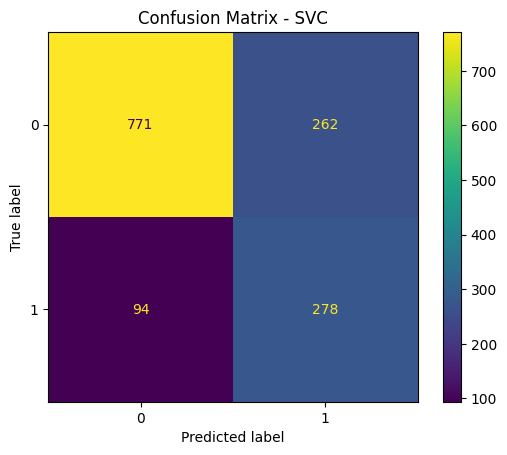


KNN Results (Threshold = 0.3)
Accuracy: 0.6890
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1033
           1       0.45      0.85      0.59       372

    accuracy                           0.69      1405
   macro avg       0.69      0.74      0.67      1405
weighted avg       0.80      0.69      0.71      1405

Recall (Churn=1): 0.8522


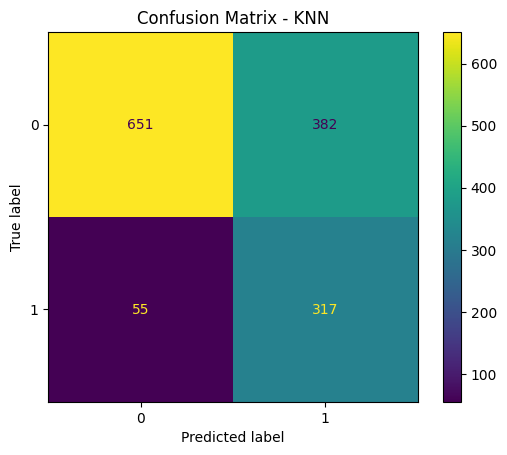

In [ ]:
# 1. Import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier


pipe_logistic = ImbPipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

pipe_svc = ImbPipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced', probability=True, random_state=42))
])

pipe_knn = ImbPipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 5. Train models
pipe_logistic.fit(X_train, y_train)
pipe_svc.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# 6. Predict using custom threshold
threshold = 0.3

# Logistic Regression
y_proba_log = pipe_logistic.predict_proba(X_test)[:, 1]
y_pred_log = (y_proba_log >= threshold).astype(int)

# SVC
y_proba_svc = pipe_svc.predict_proba(X_test)[:, 1]
y_pred_svc = (y_proba_svc >= threshold).astype(int)

# KNN
y_proba_knn = pipe_knn.predict_proba(X_test)[:, 1]
y_pred_knn = (y_proba_knn >= threshold).astype(int)

# 7. Evaluate
models = {
    'Logistic Regression': (y_pred_log, pipe_logistic),
    'SVC': (y_pred_svc, pipe_svc),
    'KNN': (y_pred_knn, pipe_knn),
}

for name, (y_pred, pipe) in models.items():
    print(f"\n{name} Results (Threshold = {threshold})")
    print("=" * 60)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Recall (Churn=1): {report['1']['recall']:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [21]:
dt_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 3. تحديد الـ Grid Search Parameters
param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# 4. تطبيق GridSearchCV باستخدام recall كمقياس
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

y_train_probs = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_probs >= 0.3).astype(int)

# 4.6 طباعة تقرير التدريب
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

# 5. أفضل موديل من الـ GridSearch
best_dt_model = grid_search.best_estimator_

# 6. التنبؤ على بيانات الاختبار (بـ threshold 0.3)
y_probs = best_dt_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.3).astype(int)

# 7. طباعة النتائج
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      4131
           1       0.40      0.94      0.56      1485

    accuracy                           0.62      5616
   macro avg       0.68      0.72      0.61      5616
weighted avg       0.81      0.62      0.63      5616

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.49      0.65      1033
           1       0.40      0.93      0.56       372

    accuracy                           0.61      1405
   macro avg       0.68      0.71      0.60      1405
weighted avg       0.81      0.61      0.62      1405



In [22]:
import joblib
joblib.dump(best_dt_model, 'pipeline_model.pkl')
# Load Model 
pipeline_model = joblib.load('pipeline_model.pkl')  
